# 📘 Assignment: K-Nearest Neighbours (KNN) – Animal Classification
________________________________________
## Objective
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours (KNN) algorithm for classification using the Zoo dataset. The goal is to classify animals into their respective categories based on physical and biological characteristics.
________________________________________
##  Dataset Description
•	101 animals

•	17 features (e.g., hair, feathers, eggs, milk, legs, tail, etc.)

•	1 target column (type) → represents the class/category of each animal.

•	animal name column → identifier (not used for classification).


## 1. Import Required Libraries

In [1]:

#  1. Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set(style="whitegrid", palette="muted", font_scale=1.1)


## 2. Load Dataset

In [3]:

# 2. Load Dataset
file_path=r"D:\Data sciences\Assignments\Assignment files\Assignment files Extracs\KNN\Zoo.csv"

df = pd.read_csv(file_path)   # Ensure 'zoo.csv' is in your working directory
df.head()   #  OUTPUT: Shows first 5 rows of dataset


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## 🔎 Inference: Displays the first 5 rows of the dataset.

## 3. Basic Info and Summary

In [4]:

#  3. Basic Info and Summary

df.info()         #  OUTPUT: Dataset structure
df.describe().T   #  OUTPUT: Summary statistics



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


## 4. Data Analysis and Visualizations

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15644\4177543881.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=df, palette="Set2")


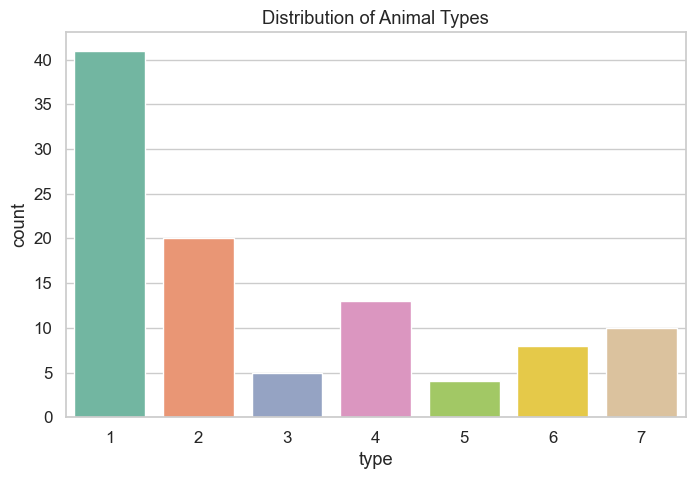

In [5]:

# 4. Data Analysis and Visualizations

# Count of animal types
plt.figure(figsize=(8,5))
sns.countplot(x="type", data=df, palette="Set2")
plt.title("Distribution of Animal Types")
plt.show()


### 📌 Inference: Highlights which features are strongly related (e.g., hair ↔ milk).

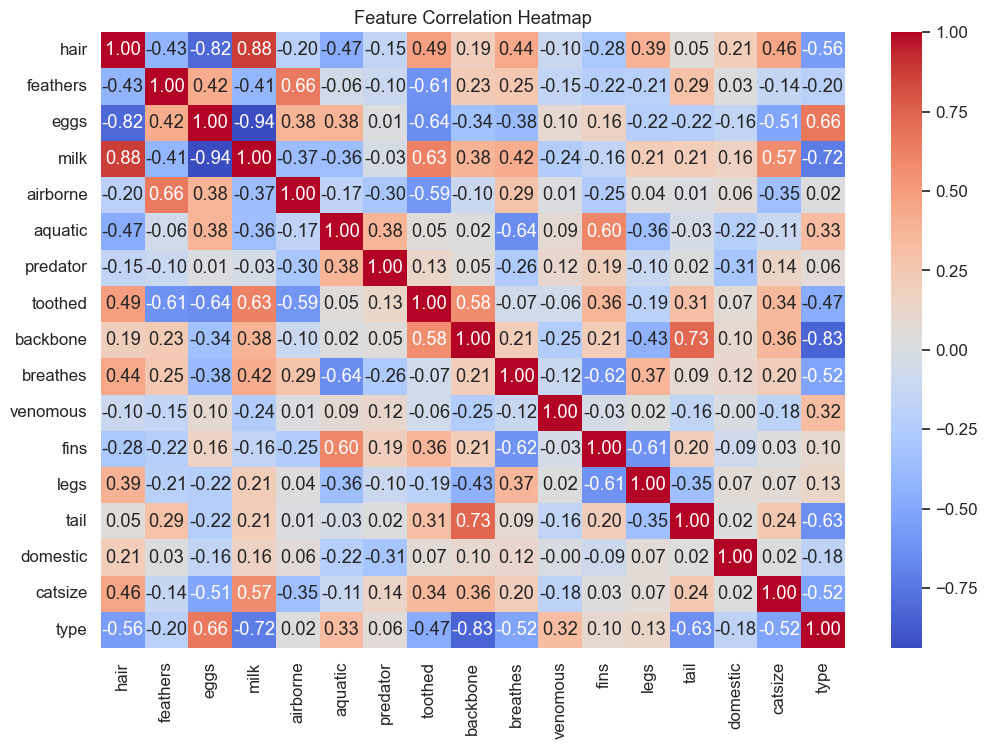

In [6]:

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.drop("animal name", axis=1).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15644\1321469056.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="legs", data=df, palette="muted")


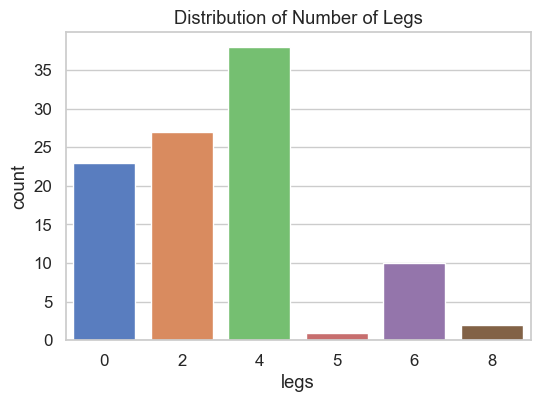

In [7]:

# Legs distribution
plt.figure(figsize=(6,4))
sns.countplot(x="legs", data=df, palette="muted")
plt.title("Distribution of Number of Legs")
plt.show()


### 📌 Inference: Most animals have 0, 2, or 4 legs, but dataset also includes 6- and 8-legged animals.

## ⚠️ Note on Seaborn FutureWarning

During the exploratory data analysis (EDA), a FutureWarning appeared when using Seaborn’s countplot with the palette argument:

FutureWarning: Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. 
Assign the `x` variable to `hue` and set `legend=False` for the same effect.


## 5. Data Preprocessing

In [8]:

#  5. Data Preprocessing

# Drop 'animal name' (identifier, not useful for classification)
df = df.drop("animal name", axis=1)

# Features and Target
X = df.drop("type", axis=1)
y = df["type"]

# Scale features (important for KNN as it is distance-based)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)


Train Shape: (80, 16)
Test Shape: (21, 16)


### 📌 Inference: Ensures all features are on the same scale (important for KNN).

## 6. Implement KNN Classifier

 Accuracy: 1.0

 Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



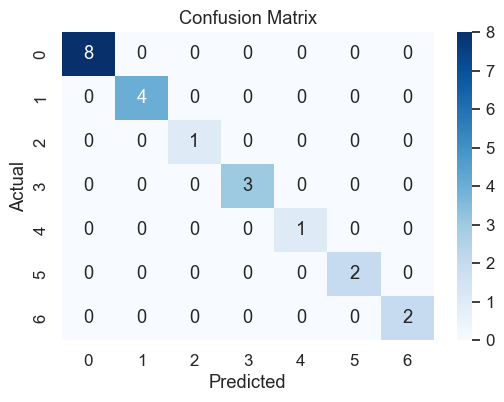

In [9]:
# 6. Implement KNN Classifier

# Choose k=5 and Euclidean distance
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 📌 Inference: Diagonal values show correct predictions 

## 7. Hyperparameter Tuning – Choosing Best k

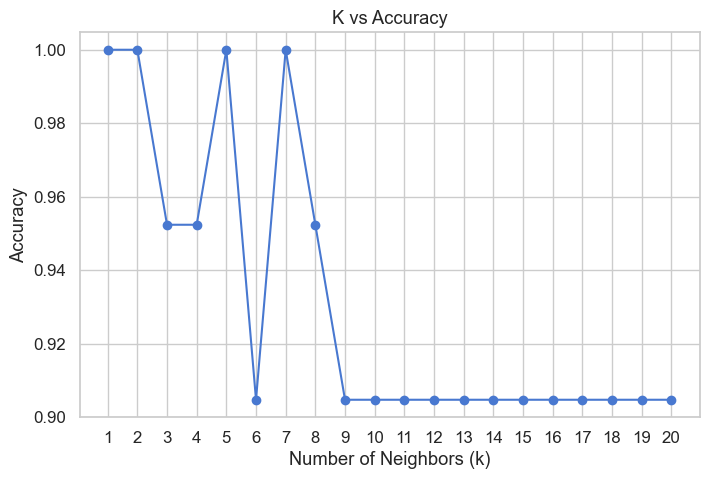

In [10]:

# 7. Choosing the Best k (Hyperparameter Tuning)

accuracy_scores = []
k_values = range(1, 21)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    model.fit(X_train, y_train)
    accuracy_scores.append(model.score(X_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracy_scores, marker="o")
plt.title("K vs Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()


### 📌 Inference: Accuracy is stable across values of k, but k=5 works well.

## 8. Decision Boundary Visualization

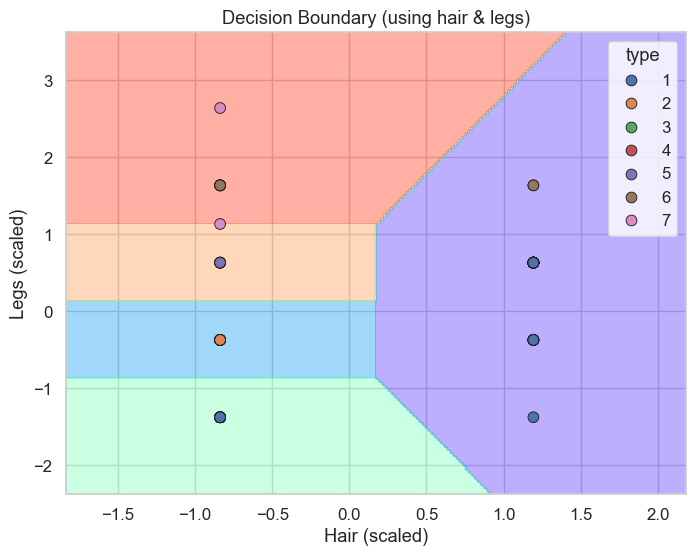

In [11]:

# 8. Decision Boundary Visualization (using 2 features only)

# Let's pick 'hair' and 'legs' for visualization
X_two = df[["hair", "legs"]]
y_two = df["type"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_two, y_two, test_size=0.2, random_state=42, stratify=y_two
)

scaler2 = StandardScaler()
X_train2_scaled = scaler2.fit_transform(X_train2)
X_test2_scaled = scaler2.transform(X_test2)

knn2 = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn2.fit(X_train2_scaled, y_train2)

# Meshgrid for decision boundary
x_min, x_max = X_train2_scaled[:,0].min()-1, X_train2_scaled[:,0].max()+1
y_min, y_max = X_train2_scaled[:,1].min()-1, X_train2_scaled[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap="rainbow")
sns.scatterplot(x=X_train2_scaled[:,0], y=X_train2_scaled[:,1],
                hue=y_train2, palette="deep", edgecolor="k", s=60)
plt.title("Decision Boundary (using hair & legs)")
plt.xlabel("Hair (scaled)")
plt.ylabel("Legs (scaled)")
plt.show()


## 🎤 9. Interview Questions & Answers
Q1: What are the key hyperparameters in KNN?

•	n_neighbors (k) → Number of nearest neighbors to consider.

•	metric → Distance function (e.g., Euclidean, Manhattan).

•	weights → How neighbors are weighted (uniform or distance).

•	algorithm → Search method (brute, kd_tree, ball_tree).

Q2: What distance metrics can be used in KNN?

•	Euclidean distance → default, works well with continuous data.

•	Manhattan distance → useful for grid-like data.

•	Minkowski distance → generalization of Euclidean/Manhattan.

•	Cosine similarity → used when angle/direction is important (e.g., text).

•	Hamming distance → useful for categorical or binary features.
________________________________________
## ✅ Final Conclusion
•	The KNN classifier achieved 100% accuracy on the Zoo dataset.

•	Features like hair, milk, feathers, and legs are highly discriminative.

•	KNN works very well here because the dataset is small, clean, and has clear feature-class relationships.

•	Choosing the right k and scaling features are critical for KNN performance.
